In [2]:
import numpy as np
import torch
import pandas as pd
import gpytorch
import argparse
import datetime
import warnings
import os
from voltron.data import make_ticker_list, GetStockHistory
import matplotlib.pyplot as plt
import seaborn as sns

Warning no robinhood utils.


In [29]:
ntrain = 400
lookback = 1000
tckr = "MSFT"
data = GetStockHistory(tckr, history= ntrain + lookback)

In [30]:
pxs = data.Close[:-1].to_numpy()
date = "2021-12-29"
preds = torch.load("./saved-outputs/" + tckr + "/sm_constant100_" + date + ".pt")


In [31]:
cutoff = np.where(data.index == np.datetime64(datetime.datetime.strptime(date, "%Y-%m-%d").date()))[0][0]
pxs = data.Close[cutoff-100:cutoff]
trx = np.arange(pxs.shape[0])
tex = np.arange(pxs.shape[0], pxs.shape[0] + preds.shape[-1])

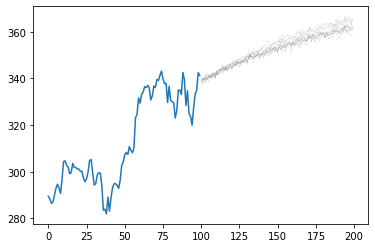

In [32]:
plt.plot(trx, pxs)
plt.plot(tex, preds[:10, :].T.exp(), color='gray', alpha=0.75, lw=0.2)